In [1]:
from pathlib import Path
import sys
 
if sys.argv:
    sys.path.insert(0, str(Path('/Users/ogrobertino/UpliftModelingResearch/').resolve()))
%load_ext autoreload
%autoreload 2

from src.global_params import BASE_PATH
import pandas as pd
    
# from src.models.ICausalML.Models import XModel
# model = XModel(from_load=True, path = str(BASE_PATH) + "/" + path)

In [3]:
table = pd.read_csv(BASE_PATH + "/exps/stats.tsv", sep='\t')

In [4]:
from src.models.CausalML.Models import XModel, TModel, SModel, DRModel

Failed to import duecredit due to No module named 'duecredit'


In [ ]:
from src.models.CausalML.Models import XModel, TModel, SModel, DRModel

def best_models(class_name_need):
    models = []
    i = 0
    j=0
    best = table[table.Model == class_name_need].sort_values(by=['AUUC (test)'], ascending=False)
    while i < 5:
        class_name = best['Model'].iloc[j]
        path = best['Path'].iloc[j]
        index = best['Path'].reset_index().iloc[j]['index']
        if class_name_need == 'XModel':
            if index < 29:
                j+=1
                continue
        models.append(globals()[class_name](from_load=True, path=str(BASE_PATH) + '/' + path))
        i+=1
        j+=1
    return models

In [6]:
models_t = best_models('TModel')
models_s = best_models('SModel')
models_x = best_models('XModel')
models_dr = best_models('DRModel')

Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/21/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/21/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/92/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/92/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/1/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/1/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/2/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/2/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/9/model.pkl.
Config loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/9/config.json.
Model loaded from /Users/ogrobertino/UpliftModelingResearch/exps/lazada/100/61/model.pkl.
C

In [7]:
import numpy as np
importances  = np.zeros(models_s[0].model.models[1].feature_importances_.shape)

In [8]:
improtances_s = []
for model in models_s:
    improtances_s.append(model.model.models[1].feature_importances_[:-1])

improtances_t = []
for model in models_t:
    improtances_t.append(model.model.models_c[1].feature_importances_)
    improtances_t.append(model.model.models_t[1].feature_importances_)

importances_x = []
for model in models_x:
    importances_x.append(model.model.models_tau_t[1].feature_importances_)
    importances_x.append(model.model.models_tau_c[1].feature_importances_)
    importances_x.append(model.model.models_mu_c[1].feature_importances_)
    importances_x.append(model.model.models_mu_t[1].feature_importances_)

importances_dr = []
for model in models_dr:
    importances_dr.append(model.model.models_mu_c[0].feature_importances_)
    importances_dr.append(model.model.models_mu_c[1].feature_importances_)
    importances_dr.append(model.model.models_mu_c[2].feature_importances_)

    importances_dr.append(model.model.models_mu_t[1][0].feature_importances_)
    importances_dr.append(model.model.models_mu_t[1][1].feature_importances_)
    importances_dr.append(model.model.models_mu_t[1][2].feature_importances_)

    importances_dr.append(model.model.models_tau[1][0].feature_importances_)
    importances_dr.append(model.model.models_tau[1][1].feature_importances_)
    importances_dr.append(model.model.models_tau[1][2].feature_importances_)

In [9]:
importances = np.vstack([improtances_s, improtances_t, importances_x, importances_dr])

In [10]:
importances_norm = importances.sum(axis=0) / importances.sum()

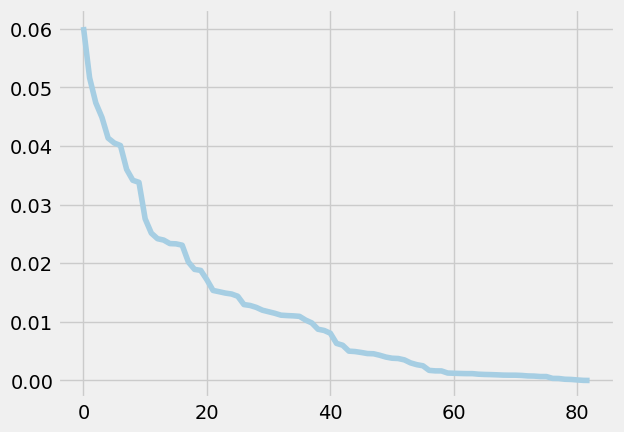

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.sort(importances_norm)[::-1])

In [12]:
np.argsort(importances_norm)[::-1]

array([24,  1,  2, 20, 12, 21, 29, 77, 79, 22, 15, 45, 76, 32, 31, 10, 19,
       13, 80, 81, 78, 16,  8, 14,  5, 28,  4, 23, 26, 30, 34,  0, 27, 82,
       18, 25, 49,  9, 54,  3, 11, 17, 65, 63, 55,  6, 33, 64,  7, 56, 37,
       67, 35, 38, 48, 36, 39, 57, 61, 59, 52, 70, 62, 71, 53, 58, 75, 72,
       51, 66, 40, 69, 73, 41, 74, 50, 42, 43, 44, 60, 46, 47, 68])

In [18]:
importances_norm[np.argsort(importances_norm)[::-1]][:83]

array([6.02939886e-02, 5.16346454e-02, 4.73680563e-02, 4.48843829e-02,
       4.13509403e-02, 4.05057333e-02, 4.00794081e-02, 3.60055543e-02,
       3.41538669e-02, 3.37983701e-02, 2.75814835e-02, 2.51352989e-02,
       2.41874441e-02, 2.39521636e-02, 2.33543993e-02, 2.33085186e-02,
       2.30804771e-02, 2.02141082e-02, 1.89540669e-02, 1.87806506e-02,
       1.71834587e-02, 1.53605937e-02, 1.51404116e-02, 1.49083000e-02,
       1.47513065e-02, 1.43699245e-02, 1.29520428e-02, 1.27983258e-02,
       1.24708591e-02, 1.19886880e-02, 1.17265292e-02, 1.14637904e-02,
       1.11434126e-02, 1.10726139e-02, 1.10244627e-02, 1.09432532e-02,
       1.03007610e-02, 9.82017663e-03, 8.74459361e-03, 8.53276881e-03,
       8.06310155e-03, 6.33082351e-03, 6.01323350e-03, 5.01067178e-03,
       4.93808564e-03, 4.78161737e-03, 4.59687143e-03, 4.55890055e-03,
       4.30707051e-03, 3.99735961e-03, 3.80006343e-03, 3.74903276e-03,
       3.51349809e-03, 3.00301871e-03, 2.69909457e-03, 2.51035823e-03,
      

In [21]:
importances_norm[np.argsort(importances_norm)[::-1]][:40]

array([0.06029399, 0.05163465, 0.04736806, 0.04488438, 0.04135094,
       0.04050573, 0.04007941, 0.03600555, 0.03415387, 0.03379837,
       0.02758148, 0.0251353 , 0.02418744, 0.02395216, 0.0233544 ,
       0.02330852, 0.02308048, 0.02021411, 0.01895407, 0.01878065,
       0.01718346, 0.01536059, 0.01514041, 0.0149083 , 0.01475131,
       0.01436992, 0.01295204, 0.01279833, 0.01247086, 0.01198869,
       0.01172653, 0.01146379, 0.01114341, 0.01107261, 0.01102446,
       0.01094325, 0.01030076, 0.00982018, 0.00874459, 0.00853277])

In [22]:
train_data = pd.read_csv('../data/trash/lazada/full_trainset.csv')
test_data = pd.read_csv('../data/trash/lazada/full_testset.csv')

In [23]:
train_data['target'] = train_data['label']
train_data['treatment'] = train_data['is_treat']
test_data['target'] = test_data['label']
test_data['treatment'] = test_data['is_treat']

In [24]:
train_data = train_data.drop(['data_id', 'label', 'is_treat'],axis=1)
test_data = test_data.drop(['data_id', 'label', 'is_treat'],axis=1)

In [25]:
need_cols = sorted([f'f{x}' for x in np.argsort(importances_norm)[::-1][:40]])

In [26]:
train_data = train_data.loc[:, [*need_cols, *['target', 'treatment']]]
test_data = test_data.loc[:, [*need_cols, *['target', 'treatment']]]

In [27]:
BASE_PATH

'/Users/ogrobertino/UpliftModelingResearch'

In [28]:
from src.datasets import sample_features
percents = [100, 50]
sample_features(percents, train_data, test_data, str(BASE_PATH) + '/data/lazada2')

## Для lazada opt

In [34]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/trash/lazada/full_trainset.csv')
count_for_test = int(0.25 * len(df))
train_data, test_data = train_test_split(df, test_size=count_for_test)

In [35]:
train_data['target'] = train_data['label']
train_data['treatment'] = train_data['is_treat']
test_data['target'] = test_data['label']
test_data['treatment'] = test_data['is_treat']

In [36]:
print('TRAIN')
print('Event-rate treatment: ' + str(train_data[train_data['treatment'] == 1]['target'].mean()),\
      '\nEvent-rate control: ' + str(train_data[train_data['treatment'] == 0]['target'].mean()))

print('TEST')
print('Event-rate treatment: ' + str(test_data[test_data['treatment'] == 1]['target'].mean()),\
      '\nEvent-rate control: ' + str(test_data[test_data['treatment'] == 0]['target'].mean()))

TRAIN
Event-rate treatment: 0.05648073575641059 
Event-rate control: 0.009491015418510345
TEST
Event-rate treatment: 0.05710847115459275 
Event-rate control: 0.009297755771547202


In [37]:
train_data = train_data.drop(['data_id', 'label', 'is_treat'],axis=1)
test_data = test_data.drop(['data_id', 'label', 'is_treat'],axis=1)

In [39]:
train_data = train_data.loc[:, [*need_cols, *['target', 'treatment']]]
test_data = test_data.loc[:, [*need_cols, *['target', 'treatment']]]

In [40]:
from src.datasets import sample_features
percents = [100, 50]
sample_features(percents, train_data, test_data, str(BASE_PATH) + '/data/lazada_v2_opt')

In [45]:
from src.global_params import BASE_PATH, EXPS_PATH
table = pd.read_csv(BASE_PATH + f"/{EXPS_PATH}/stats.tsv", sep='\t')
table

,Model,Path,Dataset,Features Percent,Latency (ms),Binary Size (MB),AUUC,AUQC,Precision@5,Precision@10,Precision@15,Precision@20,Precision@25,Precision@30,Precision@50,Compressions
0,TModel,exps2/lazada_v2_opt/100/0,lazada_v2_opt,100,0.030237,0.334086,0.002346,0.195382,0.081493,0.068708,0.063437,0.068708,0.059776,0.056793,0.050454,{}
1,TModel,exps2/lazada_v2_opt/100/1,lazada_v2_opt,100,0.030409,11.822807,0.004981,0.265172,0.079252,0.064963,0.061113,0.064963,0.058768,0.057402,0.053567,{}
2,TModel,exps2/lazada_v2_opt/100/2,lazada_v2_opt,100,0.031624,15.993967,0.002583,0.332934,0.051269,0.057243,0.054876,0.057243,0.053437,0.052666,0.050080,{}
3,TModel,exps2/lazada_v2_opt/100/3,lazada_v2_opt,100,0.031056,0.240567,0.001986,0.237501,0.071765,0.064407,0.059827,0.064407,0.056802,0.054848,0.050347,{}
4,SModel,exps2/lazada_v2_opt/100/4,lazada_v2_opt,100,0.030771,0.876402,0.001676,0.207645,0.074818,0.063862,0.058756,0.063862,0.056978,0.054587,0.049828,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,DRModel,exps2/lazada_v2_opt/50/35,lazada_v2_opt,50,0.066894,1.666689,0.001858,0.191788,0.086452,0.063739,0.059561,0.063739,0.056574,0.054545,0.050547,{}
76,DRModel,exps2/lazada_v2_opt/50/36,lazada_v2_opt,50,0.068155,47.737993,0.007524,0.332098,0.087470,0.068462,0.064021,0.068462,0.061802,0.060741,0.055688,{}
77,DRModel,exps2/lazada_v2_opt/50/37,lazada_v2_opt,50,0.066742,1.467241,0.004265,0.292756,0.075572,0.065441,0.060078,0.065441,0.057948,0.056630,0.052277,{}
78,DRModel,exps2/lazada_v2_opt/50/38,lazada_v2_opt,50,0.068687,239.202193,0.009547,0.338272,0.085913,0.070819,0.067824,0.070819,0.065374,0.063869,0.058469,{}


In [52]:
def best_models(class_name_need, features_cnt):
    models = []
    i = 0
    j=0
    best = table[(table.Model == class_name_need) &(table["Features Percent"] == features_cnt)].sort_values(by=['Precision@10'], ascending=False)
    while i < 5:
        class_name = best['Model'].iloc[j]
        path = best['Path'].iloc[j]
        index = best['Path'].reset_index().iloc[j]['index']
        models.append(globals()[class_name](from_load=True, path=str(BASE_PATH) + '/' + path))
        i+=1
        j+=1
    return models

models_t_100 = best_models('TModel',100)
models_s_100 = best_models('SModel', 100)
models_x_100 = best_models('XModel', 100)
models_dr_100 = best_models('DRModel', 100)

models_t_50 = best_models('TModel',50)
models_s_50 = best_models('SModel', 50)
models_x_50 = best_models('XModel', 50)
models_dr_50 = best_models('DRModel', 50)

In [53]:
improtances_s_100 = []
for model in models_s_100:
    improtances_s_100.append(model.model.models[1].feature_importances_[:-1])

improtances_t_100 = []
for model in models_t_100:
    improtances_t_100.append(model.model.models_c[1].feature_importances_)
    improtances_t_100.append(model.model.models_t[1].feature_importances_)

importances_x_100 = []
for model in models_x_100:
    importances_x_100.append(model.model.models_tau_t[1].feature_importances_)
    importances_x_100.append(model.model.models_tau_c[1].feature_importances_)
    importances_x_100.append(model.model.models_mu_c[1].feature_importances_)
    importances_x_100.append(model.model.models_mu_t[1].feature_importances_)

importances_dr_100 = []
for model in models_dr:
    importances_dr_100.append(model.model.models_mu_c[0].feature_importances_)
    importances_dr_100.append(model.model.models_mu_c[1].feature_importances_)
    importances_dr_100.append(model.model.models_mu_c[2].feature_importances_)

    importances_dr_100.append(model.model.models_mu_t[1][0].feature_importances_)
    importances_dr_100.append(model.model.models_mu_t[1][1].feature_importances_)
    importances_dr_100.append(model.model.models_mu_t[1][2].feature_importances_)

    importances_dr_100.append(model.model.models_tau[1][0].feature_importances_)
    importances_dr_100.append(model.model.models_tau[1][1].feature_importances_)
    importances_dr_100.append(model.model.models_tau[1][2].feature_importances_)

In [54]:
importances_100 = np.vstack([improtances_s_100, improtances_t_100, importances_x_100, importances_dr_100])
importances_norm_100 = importances_100.sum(axis=0) / importances_100.sum()

In [55]:
importances_norm_100

array([0.01918158, 0.05143992, 0.03453063, 0.01824815, 0.02984082,
       0.010019  , 0.01172833, 0.02982469, 0.01733415, 0.00955716,
       0.04692109, 0.02311157, 0.02480516, 0.03765115, 0.02372744,
       0.01341736, 0.02376198, 0.03257691, 0.05239079, 0.07014359,
       0.05546228, 0.01979143, 0.07279264, 0.02277065, 0.02009008,
       0.02294404, 0.01598216, 0.00118148, 0.00018178, 0.02969794,
       0.00065382, 0.00301452, 0.00615517, 0.00618931, 0.02435846,
       0.02502277, 0.02546021, 0.02113005, 0.02754626, 0.01936348])

In [63]:
np.array(importances_dr_50).shape

(45, 40)

In [74]:
improtances_s_50 = []
for model in models_s_50:
    improtances_s_50.append(model.model.models[1].feature_importances_[:-1])

improtances_t_50 = []
for model in models_t_50:
    improtances_t_50.append(model.model.models_c[1].feature_importances_)
    improtances_t_50.append(model.model.models_t[1].feature_importances_)

importances_x_50 = []
for model in models_x_50:
    importances_x_50.append(model.model.models_tau_t[1].feature_importances_)
    importances_x_50.append(model.model.models_tau_c[1].feature_importances_)
    importances_x_50.append(model.model.models_mu_c[1].feature_importances_)
    importances_x_50.append(model.model.models_mu_t[1].feature_importances_)

importances_dr_50 = []
for model in models_dr_50:
    importances_dr_50.append(model.model.models_mu_c[0].feature_importances_)
    importances_dr_50.append(model.model.models_mu_c[1].feature_importances_)
    importances_dr_50.append(model.model.models_mu_c[2].feature_importances_)

    importances_dr_50.append(model.model.models_mu_t[1][0].feature_importances_)
    importances_dr_50.append(model.model.models_mu_t[1][1].feature_importances_)
    importances_dr_50.append(model.model.models_mu_t[1][2].feature_importances_)

    importances_dr_50.append(model.model.models_tau[1][0].feature_importances_)
    importances_dr_50.append(model.model.models_tau[1][1].feature_importances_)
    importances_dr_50.append(model.model.models_tau[1][2].feature_importances_)

importances_50 = np.vstack([improtances_s_50, improtances_t_50, importances_x_50, importances_dr_50])
importances_norm_50 = importances_50.sum(axis=0) / importances_50.sum()

In [80]:
from src.global_params import *
pd.read_csv(f"{BASE_PATH}/data/lazada_v2_opt/50/train.tsv", sep='\t').columns[np.argsort(importances_norm_50)[::-1]]
# np.argsort(importances_norm_50)[::-1]

Index(['f2', 'f30', 'f27', 'f26', 'f10', 'f80', 'f32', 'f23', 'f9', 'f8',
       'f81', 'f20', 'f0', 'f34', 'f14', 'f18', 'f77', 'f19', 'f76', 'f54',
       'f49'],
      dtype='object')

In [81]:
pd.read_csv(f"{BASE_PATH}/data/lazada_v2_opt/100/train.tsv", sep='\t').columns[np.argsort(importances_norm_100)[::-1]]

Index(['f30', 'f28', 'f29', 'f27', 'f1', 'f2', 'f22', 'f10', 'f26', 'f13',
       'f16', 'f5', 'f82', 'f80', 'f8', 'f21', 'f79', 'f25', 'f23', 'f20',
       'f34', 'f31', 'f81', 'f32', 'f3', 'f9', 'f0', 'f12', 'f18', 'f4', 'f24',
       'f15', 'f14', 'f19', 'f78', 'f77', 'f76', 'f45', 'f54', 'f49'],
      dtype='object')

In [102]:
pd.read_csv(f"{BASE_PATH}/data/lazada_v2_opt/100/train.tsv", sep='\t').columns[np.argsort(importances_norm_100)[::-1]][:20]

Index(['f30', 'f28', 'f29', 'f27', 'f1', 'f2', 'f22', 'f10', 'f26', 'f13',
       'f16', 'f5', 'f82', 'f80', 'f8', 'f21', 'f79', 'f25', 'f23', 'f20'],
      dtype='object')

In [84]:
train_new = pd.read_csv(f"{BASE_PATH}/data/lazada_v2_opt/100/train.tsv", sep='\t')
test_new = pd.read_csv(f"{BASE_PATH}/data/lazada_v2_opt/100/test.tsv", sep='\t')

In [103]:
test_new[['f30', 'f28', 'f29', 'f27', 'f1', 'f2', 'f22', 'f10', 'f26', 'f13',
       'f16', 'f5', 'f82', 'f80', 'f8', 'f21', 'f79', 'f25', 'f23', 'f20', 'treatment', 'target']].to_csv(f"{BASE_PATH}/data/lazada_v2_opt/50/test.tsv", sep='\t', index=False)

In [104]:
pd.read_csv(f"{BASE_PATH}/data/lazada_v2_opt/50/test.tsv", sep='\t')

,f30,f28,f29,f27,f1,f2,f22,f10,f26,f13,...,f82,f80,f8,f21,f79,f25,f23,f20,treatment,target
0,0.698970,0.344377,0.000000,30,169,169,0.000000,0.000000,0.000000,1.000000,...,-0.097122,-0.188582,0.000000,0.000000,0.081059,0.000000,0.000000,0.000000,0,1
1,0.477121,0.344435,0.000000,100,365,31,0.000000,0.000000,0.000000,0.000000,...,0.007078,0.006563,0.000000,0.000000,-0.003937,0.000000,0.000000,0.000000,1,0
2,0.845098,0.065546,0.000000,22,22,22,9.547358,2.682732,2.079442,2.406540,...,0.648962,0.013728,1.750000,2.000000,-0.621851,7.557789,7.557789,0.000000,1,0
3,0.954243,0.257406,11.071292,0,85,85,9.692489,2.915378,3.258097,3.157457,...,0.648962,0.013728,1.857143,1.714286,-0.621851,6.380188,6.380188,3.341093,1,0
4,1.041393,0.284089,0.000000,29,143,143,9.293767,1.819158,0.693147,2.606381,...,0.648962,0.013728,1.250000,1.000000,-0.621851,2.176114,2.176114,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231662,1.113943,0.460795,0.000000,100,180,180,0.000000,0.693147,0.000000,0.000000,...,0.648962,0.013728,1.000000,1.000000,-0.621851,0.000000,0.000000,0.000000,0,0
231663,0.602060,0.992657,10.999018,0,3,3,11.089378,2.185583,3.496508,3.006038,...,0.648962,0.013728,1.250000,2.750000,-0.621851,2.072582,2.072582,2.748872,1,0
231664,0.698970,0.118250,0.000000,30,365,365,0.000000,0.693147,0.000000,2.225309,...,0.044493,-0.001576,1.000000,1.000000,0.004663,0.000000,0.000000,0.000000,0,0
231665,0.301030,0.011019,0.000000,21,365,365,7.909538,1.609438,0.000000,2.025306,...,0.016554,0.013613,1.000000,1.000000,-0.016784,0.000000,0.000000,0.000000,0,0


In [105]:
train_new[['f30', 'f28', 'f29', 'f27', 'f1', 'f2', 'f22', 'f10', 'f26', 'f13',
       'f16', 'f5', 'f82', 'f80', 'f8', 'f21', 'f79', 'f25', 'f23', 'f20', 'treatment', 'target']].to_csv(f"{BASE_PATH}/data/lazada_v2_opt/50/train.tsv", sep='\t', index=False)